In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from pandas import Series
from pandas import DataFrame
series = Series.from_csv('daily-minimum-temperatures.csv', header=0)

In [4]:
dataframe = DataFrame()
dataframe['month'] = [series.index[i].month for i in range(len(series))]
dataframe['day'] = [series.index[i].day for i in range(len(series))]
dataframe['temperature'] = [series[i] for i in range(len(series))]

In [5]:
dataframe.head(5)

,month,day,temperature
0,1,1,20.7
1,1,2,17.9
2,1,3,18.8
3,1,4,14.6
4,1,5,15.8


In [7]:
temps = DataFrame(series.values)
temps

,0
0,20.7
1,17.9
2,18.8
3,14.6
4,15.8
5,15.8
6,15.8
7,17.4
8,21.8
9,20.0


# create expanding window features

In [16]:
from pandas import concat

In [17]:
window = temps.expanding()
dataframe = concat([window.min(), window.mean(), window.max(), temps.shift(-1)], axis=1)
dataframe.columns = ['min', 'mean', 'max', 't+1']

In [18]:
dataframe

,min,mean,max,t+1
0,20.7,20.700000,20.7,17.9
1,17.9,19.300000,20.7,18.8
2,17.9,19.133333,20.7,14.6
3,14.6,18.000000,20.7,15.8
4,14.6,17.560000,20.7,15.8
5,14.6,17.266667,20.7,15.8
6,14.6,17.057143,20.7,17.4
7,14.6,17.100000,20.7,21.8
8,14.6,17.622222,21.8,20.0
9,14.6,17.860000,21.8,16.2


# create a lag feature

In [19]:
temps = DataFrame(series.values)
dataframe = concat([temps.shift(1), temps], axis=1)
dataframe.columns = ['t', 't+1']
dataframe.head(5)

,t,t+1
0,NaN,20.7
1,20.7,17.9
2,17.9,18.8
3,18.8,14.6
4,14.6,15.8


In [20]:
temps = DataFrame(series.values)
dataframe = concat([temps.shift(3), temps.shift(2), temps.shift(1), temps], axis=1)
dataframe.columns = ['t-2', 't-1', 't', 't+1']
dataframe.head(5)

,t-2,t-1,t,t+1
0,NaN,NaN,NaN,20.7
1,NaN,NaN,20.7,17.9
2,NaN,20.7,17.9,18.8
3,20.7,17.9,18.8,14.6
4,17.9,18.8,14.6,15.8


# create a rolling mean feature

In [21]:
temps = DataFrame(series.values)
shifted = temps.shift(1)
window = shifted.rolling(window=2)
means = window.mean()
dataframe = concat([means, temps], axis=1)
dataframe.columns = ['mean(t-1,t)', 't+1']
dataframe.head(5)

,"mean(t-1,t)",t+1
0,NaN,20.7
1,NaN,17.9
2,19.30,18.8
3,18.35,14.6
4,16.70,15.8


# create rolling statistics features

In [22]:
temps = DataFrame(series.values)
width = 3
shifted = temps.shift(width - 1)
window = shifted.rolling(window=width)
dataframe = concat([window.min(), window.mean(), window.max(), temps], axis=1)
dataframe.columns = ['min', 'mean', 'max', 't+1']
dataframe.head(5)

,min,mean,max,t+1
0,NaN,NaN,NaN,20.7
1,NaN,NaN,NaN,17.9
2,NaN,NaN,NaN,18.8
3,NaN,NaN,NaN,14.6
4,17.9,19.133333,20.7,15.8


# create an autocorrelation plot

In [47]:
from pandas.tools.plotting import autocorrelation_plot

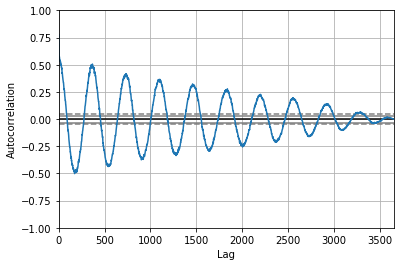

In [48]:
autocorrelation_plot(series)
pyplot.show()

# create a scatter plot

In [26]:
from matplotlib import pyplot
from pandas.tools.plotting import lag_plot

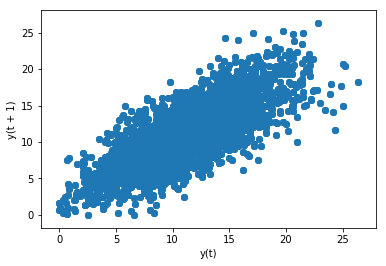

In [27]:
lag_plot(series)
pyplot.show()

# create a line plot

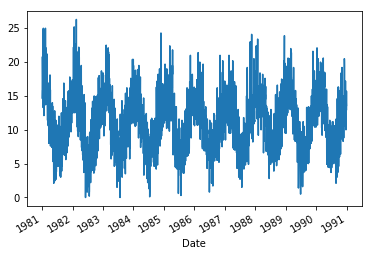

In [28]:
series.plot()
pyplot.show()

# create multiple scatter plots

In [29]:
from pandas.tools.plotting import scatter_matrix

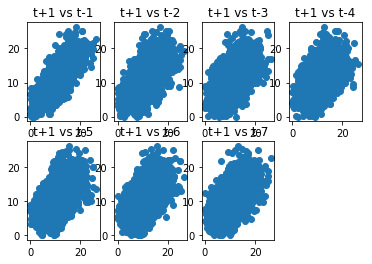

In [30]:
values = DataFrame(series.values)
lags = 7
columns = [values]
for i in range(1,(lags + 1)):
    columns.append(values.shift(i))
dataframe = concat(columns, axis=1)
columns = ['t+1']
for i in range(1,(lags + 1)):
    columns.append('t-' + str(i))
dataframe.columns = columns
pyplot.figure(1)
for i in range(1,(lags + 1)):
    ax = pyplot.subplot(240 + i)
    ax.set_title('t+1 vs t-' + str(i))
    pyplot.scatter(x=dataframe['t+1'].values, y=dataframe['t-'+str(i)].values)

pyplot.show()

# create stacked line plots

In [32]:
from pandas import TimeGrouper

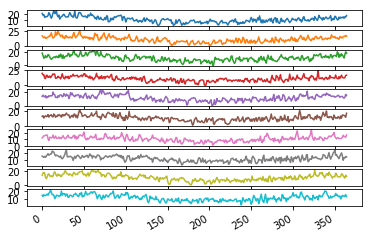

In [33]:
groups = series.groupby(TimeGrouper('A'))
years = DataFrame()
for name, group in groups:
    years[name.year] = group.values
years.plot(subplots=True, legend=False)
pyplot.show()

# create a histogram plot

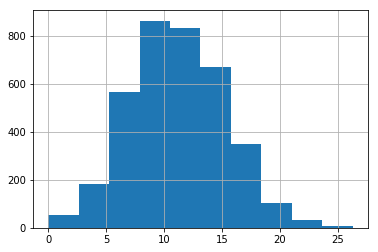

In [34]:
series.hist()
pyplot.show()

# create a dot plot

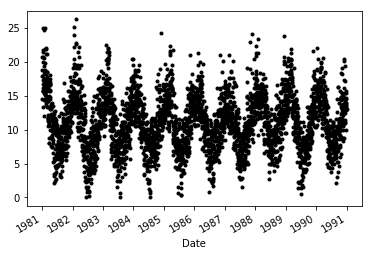

In [36]:
series.plot(style='k.')
pyplot.show()

# create a density plot

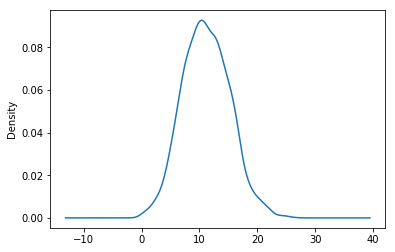

In [41]:
series.plot(kind='kde')
pyplot.show()

# create a heat map of monthly data

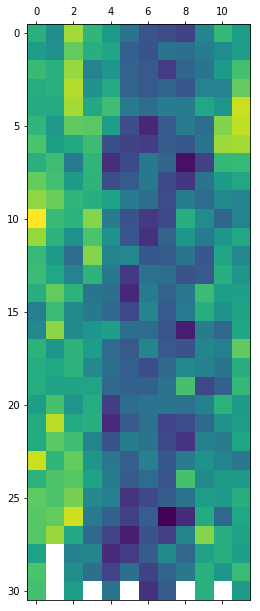

In [38]:
one_year = series['1990']
groups = one_year.groupby(TimeGrouper('M'))
months = concat([DataFrame(x[1].values) for x in groups], axis=1)
months = DataFrame(months)
months.columns = range(1,13)
pyplot.matshow(months, interpolation=None, aspect='auto')
pyplot.show()

# create a boxplot of monthly data

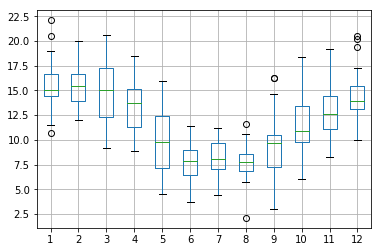

In [42]:
one_year = series['1990']
groups = one_year.groupby(TimeGrouper('M'))
months = concat([DataFrame(x[1].values) for x in groups], axis=1)
months = DataFrame(months)
months.columns = range(1,13)
months.boxplot()
pyplot.show()

# create a heat map of yearly data

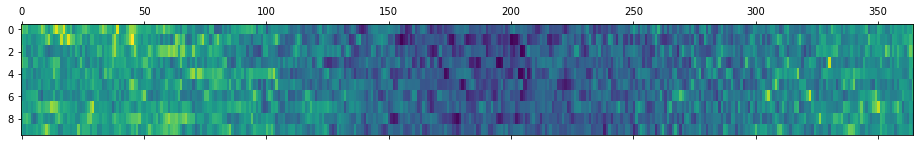

In [40]:
groups = series.groupby(TimeGrouper('A'))
years = DataFrame()
for name, group in groups:
    years[name.year] = group.values
years = years.T
pyplot.matshow(years, interpolation=None, aspect='auto')
pyplot.show()

# create a boxplot of yearly data

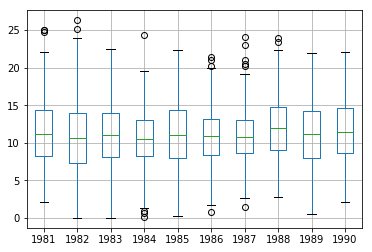

In [43]:
groups = series.groupby(TimeGrouper('A'))
years = DataFrame()
for name, group in groups:
    years[name.year] = group.values
years.boxplot()
pyplot.show()

# create an autocorrelation plot

In [45]:
from pandas.tools.plotting import autocorrelation_plot

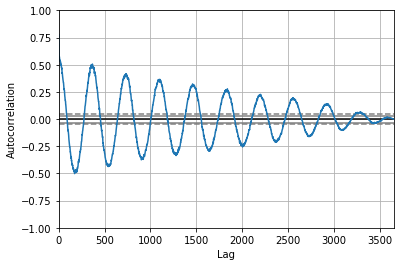

In [46]:
autocorrelation_plot(series)
pyplot.show()